In [2]:
import numpy as np
import matplotlib.pyplot as plt

Training data

In [4]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
m = len(x_train)
print("x_train =", x_train)
print("y_train =", y_train)

x_train = [1. 2.]
y_train = [300. 500.]


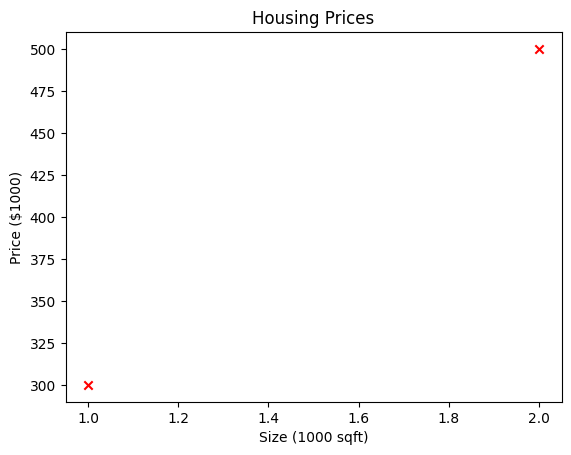

In [6]:
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Housing Prices")
plt.ylabel("Price ($1000)")
plt.xlabel("Size (1000 sqft)")
plt.show()

The Model

In [7]:
def compute_model_ouput(x, w, b):
    """
    Computes the prediction of a linear model
    """

    m = len(x)
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    
    return f_wb

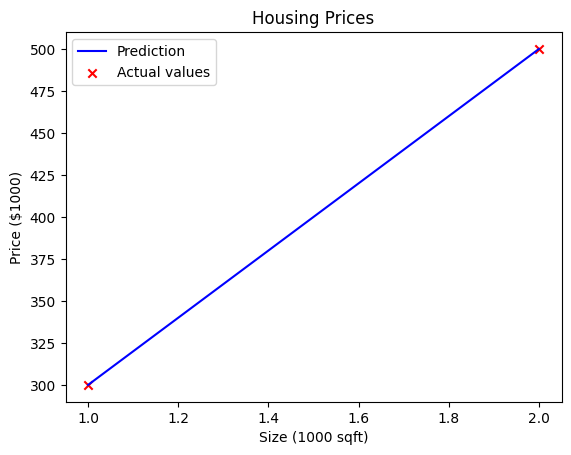

In [10]:
w = 200
b = 100

tmp_f_wb = compute_model_ouput(x_train, w, b)

plt.plot(x_train, tmp_f_wb, c='b', label="Prediction")
plt.scatter(x_train, y_train, marker='x', c='r', label="Actual values")
plt.title("Housing Prices")
plt.ylabel("Price ($1000)")
plt.xlabel("Size (1000 sqft)")
plt.legend()
plt.show()

In [11]:
w = 200                         
b = 100    
x_i = 1.2
cost_1200sqft = w * x_i + b
print("Cost =", cost_1200sqft, "thousand dollars")

Cost = 340.0 thousand dollars


In [14]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression
    """

    m = len(x)
    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i])**2
        cost_sum += cost
    total_cost = (1/(2*m)) * cost_sum

    return total_cost

In [12]:
import math, copy

def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    """

    m = len(x)
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

In [15]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w, b
    """

    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        b -= alpha * dj_db
        w -= alpha * dj_dw
        if i < 100000:
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w, b])
        if i % math.ceil(num_iters/10) == 0:
            print("Iteration =", i + 1)
            print("Cost =", J_history[-1])
            print("w =", w)
            print("b =", b)
    
    return w, b, J_history, p_history

In [16]:
w_init = 0
b_init = 0
iterations = 100000
tmp_alpha = 1e-2
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)

Iteration = 1
Cost = 79274.8125
w = 6.5
b = 4.0
Iteration = 10001
Cost = 6.735177408156018e-06
w = 199.9928559666243
b = 100.01155928881862
Iteration = 20001
Cost = 3.0886284771304165e-12
w = 199.99999516215672
b = 100.00000782779486
Iteration = 30001
Cost = 1.4164568560301418e-18
w = 199.99999999672374
b = 100.00000000530105
Iteration = 40001
Cost = 1.2621774483536189e-23
w = 199.99999999999005
b = 100.00000000001563
Iteration = 50001
Cost = 1.2621774483536189e-23
w = 199.99999999999005
b = 100.00000000001563
Iteration = 60001
Cost = 1.2621774483536189e-23
w = 199.99999999999005
b = 100.00000000001563
Iteration = 70001
Cost = 1.2621774483536189e-23
w = 199.99999999999005
b = 100.00000000001563
Iteration = 80001
Cost = 1.2621774483536189e-23
w = 199.99999999999005
b = 100.00000000001563
Iteration = 90001
Cost = 1.2621774483536189e-23
w = 199.99999999999005
b = 100.00000000001563


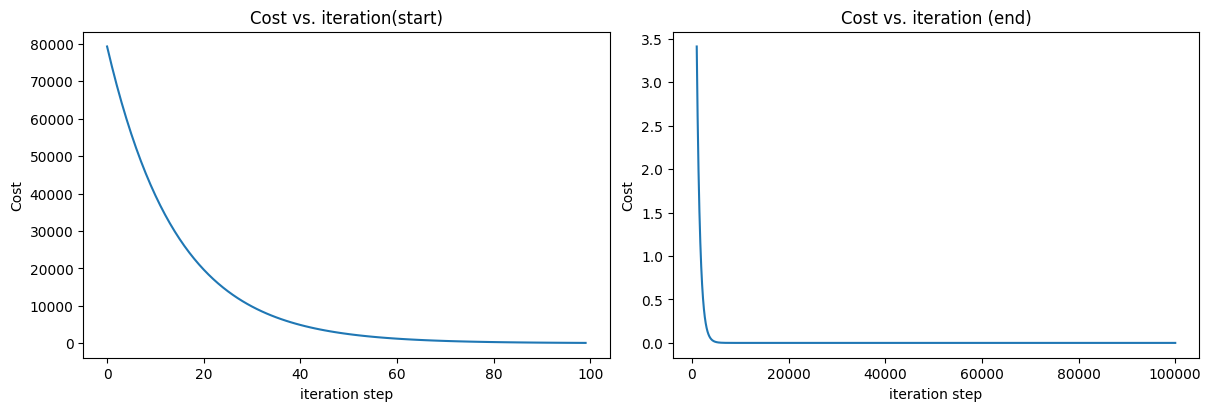

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration (start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [19]:
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

In [20]:
def predict_single_loop(x, w, b):
    """
    Single predict using linear regression
    """

    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]
        p += p_i
    p += b

    return p

In [22]:
x_vec = x_train[0, :]
f_wb = predict_single_loop(x_vec, w_init, b_init)
print("Prediction =", f_wb)

Prediction = 459.9999976194083


In [23]:
def predict(x, w, b):
    """
    Single predict using linear regression
    """

    p = np.dot(x, w) + b
    return p

In [24]:
x_vec = x_train[0, :]
f_wb = predict(x_vec, w_init, b_init)
print("Prediction =", f_wb)

Prediction = 459.9999976194083


In [26]:
def compute_cost(x, y, w, b):
    """
    Compute cost
    """

    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(x[i], w) + b
        cost += (f_wb_i - y[i])**2
    cost /= 2*m
    
    return cost

In [28]:
cost = compute_cost(x_train, y_train, w_init, b_init)
print("Cost at optimal w =", cost)

Cost at optimal w = 1.5578904045996674e-12


In [46]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    """

    m, n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0

    for i in range(m):
        err = np.dot(x[i], w) + b - y[i]
        for j in range(n):
            dj_dw[j] += err * x[i, j]
        dj_db += err
    dj_dw /= m
    dj_db /= m
    
    return dj_db, dj_dw

In [47]:
tmp_dj_db, tmp_dj_dw = compute_gradient(x_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -1.6739251122999121e-06
dj_dw at initial w,b: 
 [-2.72623574e-03 -6.27197255e-06 -2.21745574e-06 -6.92403377e-05]


In [48]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn w and b
    """

    J_history =[]
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        if i < 10000:
            J_history.append(cost_function(x, y, w, b))
        if i % math.ceil(num_iters / 10) == 0:
            print("Cost =", J_history[-1])
    
    return w, b, J_history

In [49]:
initial_w = np.zeros_like(w_init)
initial_b = 0.0
iterations = 1000
alpha = 5.0e-7
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print("w =", w_final)
print("b =", b_final)
m, _ = x_train.shape
for i in range(m):
    print("Prediction =", np.dot(x_train[i], w_final) + b_final, "Target value =", y_train[i])

Cost = 2529.4629522316304
Cost = 695.9903158352028
Cost = 694.9206979323058
Cost = 693.8604297851192
Cost = 692.8094286135915
Cost = 691.7676123706057
Cost = 690.7348997354993
Cost = 689.7112101076165
Cost = 688.6964635999458
Cost = 687.6905810327936
w = [ 0.20396569  0.00374919 -0.0112487  -0.0658614 ]
b = -0.0022354075309325345
Prediction = 426.185304971892 Target value = 460
Prediction = 286.1674720078562 Target value = 232
Prediction = 171.46763087132314 Target value = 178


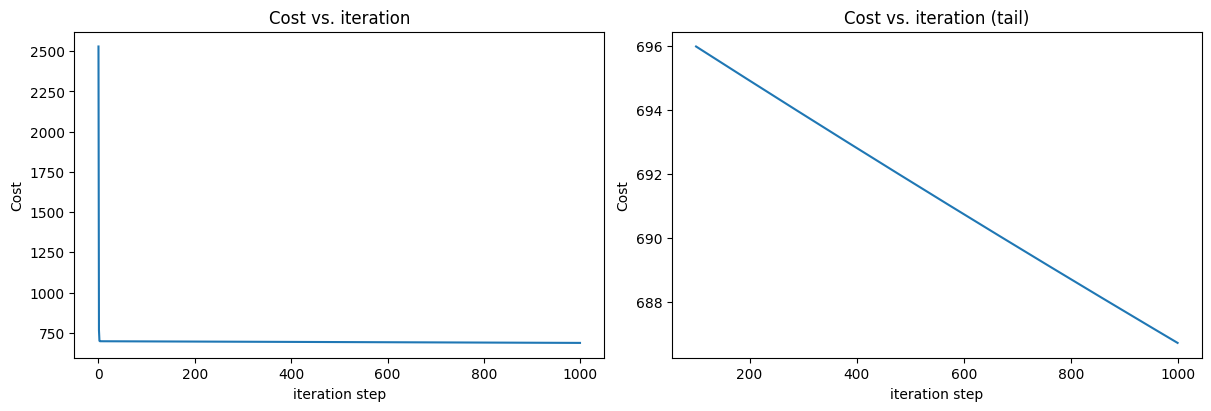

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()